In [1]:
with open('24-04-10_collimation_50mW_0-1/int_image','rb') as fp:
    buff0 = fp.read()
    
with open('24-04-10_spatial-filter_50mW_0-1/int_image','rb') as fp:
    buff1 = fp.read()

In [2]:
import numpy as np 
dt = np.dtype('uint32')
dt = dt.newbyteorder('>')
im0 = np.frombuffer(buff0, dtype=dt) 
im0 = np.reshape(im0, [960,1280])
dt = np.dtype('uint32')
dt = dt.newbyteorder('>')
im1 = np.frombuffer(buff1, dtype=dt) 
im1 = np.reshape(im1, [960,1280])

def get_image(buff, dim):
    dt = np.dtype('uint32')
    dt = dt.newbyteorder('>')
    im = np.frombuffer(buff, dtype=dt) 
    return np.reshape(im, (dim[0],dim[1]))
dim = (960,1280)

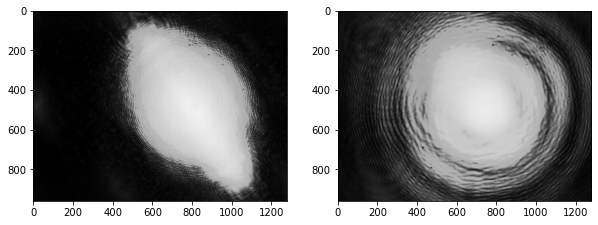

In [3]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(im0, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(im1, cmap='gray', vmin=0, vmax=255)

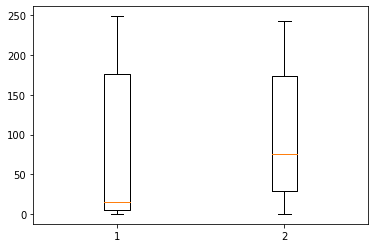

In [4]:
plt.boxplot([np.ndarray.flatten(im0), np.ndarray.flatten(im1)])
plt.figsize=(30,30)
plt.show()

In [5]:
np.mean(im1)

99.0607470703125

In [6]:
# average of last quartile – average value of brightest 25%
d0 = np.ndarray.flatten(im0)
d1 = np.ndarray.flatten(im1)
np.percentile(d1, 75)

174.0

In [7]:
I1=np.mean(d0[d0>np.percentile(d0, 75)])

In [8]:
I2=np.mean(d1[d1>np.percentile(d1, 75)])

In [9]:
I2/I1

0.968895739390655

In [10]:
dimY, dimX = np.shape(im0)
X = np.arange(dimX)
Y = np.arange(dimY)

def int_im(im):
    dimY, dimX = np.shape(im)
    X = np.arange(dimX)
    Y = np.arange(dimY)
    return np.trapz(np.trapz(im, X), Y)

int_im(im1)/int_im(im0)

1.3765607560639055

In [11]:
# name1 = '24-04-15_collimation_50mW_0-0'
# name2 = '24-04-15_spatial-filter_50mW_1-0'
# name2 = '24-04-18-histogram_108mA_2000us'
# name1 = '24-04-18-histogram_108mA_2000us_0mm'
name1 = '24-04-22-collimation_50mW_2000us_0mm'
# name2 = '24-04-22-spatial_50mW_2000us_30um_0mm_1'
name2 = '24-04-22-spatial_50mW_2000us_30um_0mm'
# name2 = '24-04-22-spatial_50mW_2000us_20um_45mm'

In [12]:
with open(name1+'/int_image','rb') as fp:
    buff0 = fp.read()
    im0 = get_image(buff0, dim)
with open(name2+'/int_image','rb') as fp:
    buff1 = fp.read()
    im1 = get_image(buff1, dim)

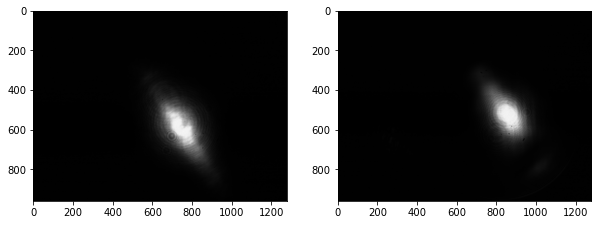

In [13]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(im0, cmap='gray', vmin=0, vmax=255)
ax[1].imshow(im1, cmap='gray', vmin=0, vmax=255)

In [ ]:
def int_im(im):
    dimY, dimX = np.shape(im)
    X = np.arange(dimX)
    Y = np.arange(dimY)
    return np.trapz(np.trapz(im, X), Y)

int_im(im1)/int_im(im0)

In [ ]:
px0 = np.ndarray.flatten(im0)
px1 = np.ndarray.flatten(im1)
bins = np.arange(256)

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,7.5))
ax[0].hist(px0 , bins=bins)
ax[1].hist(px1 , bins=bins)
plt.show()

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(15,7.5))
ax[0].hist(px0 , bins=bins)
ax[1].hist(px1 , bins=bins)
ax[0].set_xlim((220,255))
ax[1].set_xlim((220,255))
ax[0].set_ylim((0,1000))
ax[1].set_ylim((0,1000))
plt.show()

In [ ]:
np.sum(px == 255)

In [ ]:
px

In [ ]:
np.max(px)